# Prog officiel : Représenter, à l’aide d’un langage de programmation, des vecteurs accélération d’un point lors d'un mouvement.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Calcul des coordonnées du vecteur vitesse à partir du vecteur position (2D)

In [2]:
def vitesse(x, y, t):
    """ calcul des coordonnées de v """
    vx = []
    for i in range(len(x)-1):
        vx.append((x[i+1] - x[i]) / (t[i+1] - t[i]))
    vx.append(vx[-1]) # on recopie arbitrairement la dernière valeur pour conserver la taille de la liste

    vy = []
    for i in range(len(y)-1):
        vy.append((y[i+1] - y[i]) / (t[i+1] - t[i]))
    vy.append(vy[-1]) # on recopie arbitrairement la dernière valeur pour conserver la taille de la liste
    return vx, vy

## Calcul des coordonnées du vecteur accélération à partir du vecteur vitesse (2D)

In [3]:
def acceleration(vx, vy, t):
    """ calcul des coordonnées de a """
    ax = []
    for i in range(len(x)-1):
        ax.append((vx[i+1] - vx[i]) / (t[i+1] - t[i]))
    ax.append(ax[-1]) # on recopie arbitrairement la dernière valeur pour conserver la taille de la liste

    ay = []
    for i in range(len(y)-1):
        ay.append((vy[i+1] - vy[i]) / (t[i+1] - t[i]))
    ay.append(ay[-1]) # on recopie arbitrairement la dernière valeur pour conserver la taille de la liste
    return ax, ay

## Applications :

### Activité 1 : Bille ponctuelle lâchée d'une hauteur $h$ sans vitesse initiale (simulation)
On va travailler ici avec une simulation, mais on peut bien sûr s'appuyer sur des relevés expérimentaux de positions au cours du temps obtenus à partir du film d'une chute (ex : Regressi)

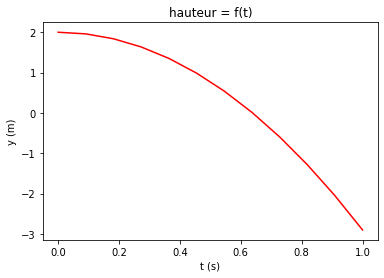

In [4]:
t = np.linspace(0, 1, 12) # création d'une série de dates (10 dates de 0 à 1 s)
x0, y0 = 0, 2 # coordonnées intiales

# modélisation par une chute libre (courbe rouge)
g = 9.8
y = y0 - 0.5 * g * t**2
x = np.array([0]*len(t))
plt.plot(t, y, color='red')
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.title('hauteur = f(t)')

plt.show()

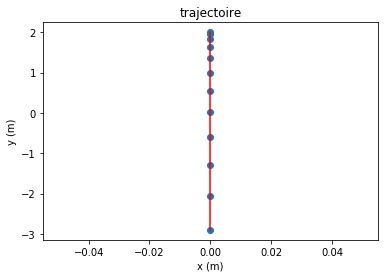

In [5]:
plt.plot(x, y, 'o')
plt.plot(x, y, color='red')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('trajectoire')

plt.show()

In [6]:
vx, vy = vitesse(x, y, t)

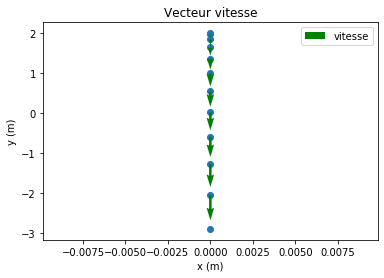

In [7]:
plt.scatter(x, y)
plt.ylabel('y (m)')
plt.xlabel('x (m)')

# ajout des vecteurs vitesse
#  on exclut le 1er et le dernier point
plt.quiver(x[1:-1], y[1:-1], vx[1:-1], vy[1:-1],  angles='xy', units='dots', scale_units='xy', scale=15, color='green', label='vitesse')
plt.legend()

plt.title('Vecteur vitesse')

plt.show()

####  Caclul et tracé des vecteurs accélération.
ATTENTION : on s'arrange pour tracer les vecteurs en les écartant de la trajectoire pour faciliter la vision.

In [8]:
ax, ay = acceleration(vx, vy, t)

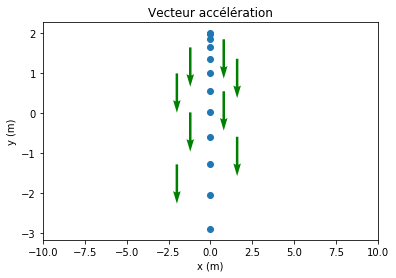

In [9]:
plt.scatter(x, y)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.axis(xmin=-10, xmax=10)

# ajout des vecteurs accélération tous les 2 points
# on exclut les 1er et  derniers points
for i in range(2, 6):
    plt.quiver(x[i:-2:4]+.4*i*(-1)**i, y[i:-2:4], ax[i:-2:4], ay[i:-2:4], angles='xy', units='dots', scale_units='xy', scale=10, color='green')

plt.title('Vecteur accélération')

plt.show()

### Activité 2 : Mouvement parabolique : bille lancée avec une vitesse v d'une hauteur $h$  (simulation)
On considère une bille lancée d'une hauteur $h$, avec un angle $\alpha$ par rapport à l'horizontale, et une vitesse intiale $v_0$.

In [10]:
# hauteur de lancement (m)
h = 5
# angle en degré, puis conversion en radians
alpha = 40
alpha = np.radians(alpha) 
# vitesse initiale (m/s)
v0 = 20
# intensité de la pesanteur (m/s2)
g = 9.8

In [11]:
# création des instants
t = np.linspace(0, 3, 30)

In [12]:
# coordonnées de positions (x, y) en fonction du temps
x = v0 * np.cos(alpha) * t

y = -0.5 * g * t**2 + v0 * np.sin(alpha) * t + h

# équation de la trajectoire
traj = -0.5 * g * (x / (v0 * np.cos(alpha)))**2 + np.tan(alpha) * x + h

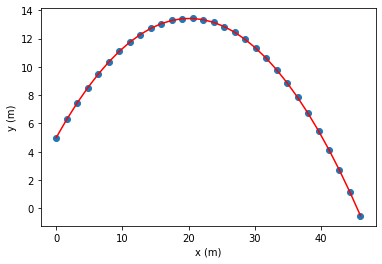

In [13]:
plt.scatter(x, y)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.plot(x, traj, 'red')
plt.show()

#### Tracé des vecteurs vitesse
On reprend les données précédentes du mouvement parabolique.

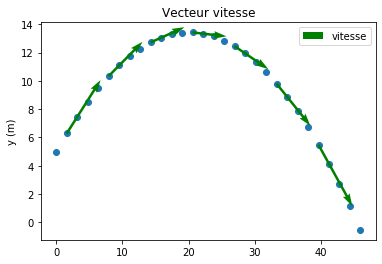

In [14]:
vx, vy = vitesse(x, y, t)

plt.scatter(x, y)
plt.ylabel('y (m)')

# ajout des vecteurs vitesse
# on ne conserve qu'un point sur 4 (pour la lisibilité), et on exclut le 1er et le dernier point
plt.quiver(x[1:-1:4], y[1:-1:4], vx[1:-1:4], vy[1:-1:4], angles='xy', units='dots', scale_units='xy', scale=3, color='green', label='vitesse')
plt.legend()
plt.title('Vecteur vitesse')
plt.show()

#### Tracé du vecteur accélération

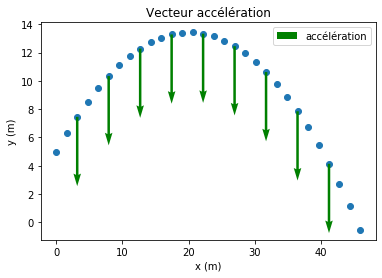

In [15]:
ax, ay = acceleration(vx, vy, t)

plt.scatter(x, y)
plt.ylabel('y (m)')
plt.xlabel('x (m)')

# ajout des vecteurs accélération
# on ne conserve qu'un point sur 3 (pour la lisibilité), et on exclut le 1er et le dernier point
plt.quiver(x[2:-2:3], y[2:-2:3], ax[2:-2:3], ay[2:-2:3], angles='xy', units='dots', scale_units='xy', scale=2, color='green', label='accélération')
plt.legend()
plt.title('Vecteur accélération')
plt.show()

### Activité 3 : Mouvement circulaire : plot paramétrique (simulation)
On considère un mouvement circulaire uniforme

In [16]:
t = np.linspace(0, 2*np.pi, 36)

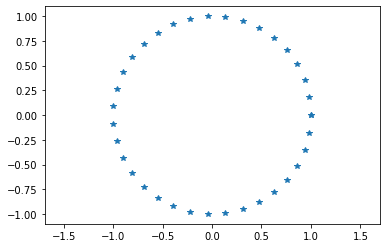

In [17]:
x = np.cos(t)
y = np.sin(t)

plt.axis('equal')

plt.plot(x, y, '*')
plt.show()

#### Tracé des vecteurs vitesse

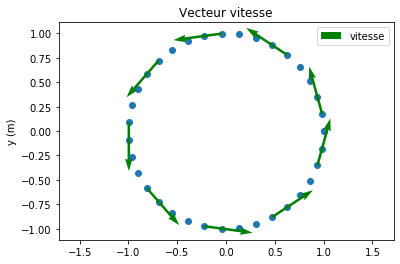

In [18]:
vx, vy = vitesse(x, y, t)

plt.scatter(x, y)
plt.ylabel('y (m)')

plt.axis('equal')

# ajout des vecteurs vitesse
# on ne conserve qu'un point sur 4 (pour la lisibilité), et on exclut le 1er et le dernier point
plt.quiver(x[1:-1:4], y[1:-1:4], vx[1:-1:4], vy[1:-1:4], angles='xy', units='dots', scale_units='xy', scale=2, color='green', label='vitesse')
plt.legend()
plt.title('Vecteur vitesse')
plt.show()

#### Tracé du vecteur accélération

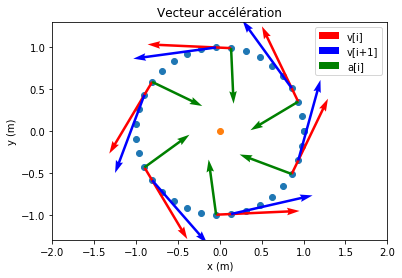

In [19]:
ax, ay = acceleration(vx, vy, t)

plt.scatter(x, y)
plt.ylabel('y (m)')
plt.xlabel('x (m)')

plt.scatter(0, 0)

plt.axis('equal')
plt.axis(xmin=-2, xmax=2, ymin=-2, ymax=2) # pour voir les fleches vitesses

# ajout des vecteurs vitesses, par "paires de points", par pas de 6
plt.quiver(x[2:-1:6], y[2:-1:6], vx[2:-1:6], vy[2:-1:6], angles='xy', units='dots', scale_units='xy', scale=1, color='red', label='v[i]')
plt.quiver(x[3:-1:6], y[3:-1:6], vx[3:-1:6], vy[3:-1:6],  angles='xy', units='dots', scale_units='xy', scale=1, color='blue', label='v[i+1]')

# ajout des vecteurs accélération, au point milieu entre 2 vecteurs vitesses
# on conserve la même échelle (scale = 1) pour tracer v et Dv
plt.quiver(x[2:-1:6], y[2:-1:6], ax[2:-1:6], ay[2:-1:6], angles='xy', units='dots', scale_units='xy', scale=1.5, color='green', label='a[i]')
plt.legend()
plt.title('Vecteur accélération')
plt.show()

**Remarque** : le vecteur accélération n'apparaît pas parfaitement radial à cause de manière (fausse... !) d'estimer la dérivée d'un vecteur.